In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
output = open("experiment1.txt", "r").read()
lines = output.split("\n")

current_degree = 20
precisions = {}
times = {}

precisions[current_degree] = []
times[current_degree] = []

for line in lines:
    if "done" in line:         #Degree X done
        current_degree += 1
        precisions[current_degree] = []
        times[current_degree] = []
    if "Precision bits" in line and len(precisions[current_degree]) < 10:
        precisions[current_degree].append(float((line)[16:]))
    if "The evaluation of" in line and len(precisions[current_degree]) < 10:
        times[current_degree].append(float((line)[39:45].replace(":", ".").replace("s", "").replace(",", "")))

precisions.pop(current_degree)
times.pop(current_degree)

df_times = pd.DataFrame(times)
df_precisions = pd.DataFrame(precisions)

In [58]:
df_precisions

,20,21,22,23,24,25,26,27,28,29,...,121,122,123,124,125,126,127,128,129,130
0,6.6380,6.8842,6.2497,6.6397,7.4262,6.8201,7.6479,8.6671,6.7423,10.2415,...,12.9991,11.0796,13.7798,12.5621,12.5752,11.5610,13.1031,10.7523,13.0081,10.4736
1,6.3193,7.5214,7.1159,8.3726,8.0706,7.4361,6.6371,9.2722,6.9549,7.7215,...,12.8188,11.9143,12.9277,12.1481,12.1240,11.3398,13.0404,10.8877,13.1179,11.2750
2,6.5864,6.4879,6.0583,7.1452,7.5329,8.2545,6.4988,8.5849,6.5665,8.8816,...,12.3772,11.9224,13.8341,12.4361,13.5989,11.0465,13.1009,12.8653,13.3625,10.4058
3,6.5624,8.5293,6.8354,6.6101,8.4261,8.9092,6.3341,7.4078,7.0922,7.7572,...,13.0711,11.4203,12.6573,12.2602,13.8349,11.2326,12.8365,11.3406,12.7649,10.9137
4,5.4913,6.8675,6.4877,7.1538,8.0197,7.1891,6.5584,7.8221,6.8641,8.5090,...,13.3993,10.8554,12.5532,12.0969,12.5981,11.2213,13.1106,11.9138,12.5346,10.9365
5,6.3120,8.3606,6.1357,7.3047,7.7068,7.9558,6.6511,8.4066,7.7106,9.3866,...,13.3086,11.3868,13.2030,12.4898,12.4797,11.8932,13.0766,10.5127,13.7880,10.4810
6,5.3610,6.7013,7.3477,7.6314,8.3324,7.1418,6.4450,7.8277,6.1824,7.7562,...,13.0445,11.9228,14.1716,12.5234,13.3122,11.2003,14.2089,10.8427,14.1580,11.4612
7,5.3007,6.4991,7.0231,7.1549,8.1408,8.8407,6.3841,7.2045,6.9847,8.5610,...,13.1168,11.4621,12.7750,12.1683,12.8090,11.4265,12.8846,11.7729,12.4052,10.5608
8,5.3554,7.0569,7.6127,7.1495,8.1464,7.2843,7.6624,9.9937,6.8282,8.6732,...,13.5736,12.1781,12.9744,12.6342,13.4381,11.1473,12.6613,10.5485,12.8240,10.5150
9,5.6962,6.9975,8.0787,6.6418,8.0645,7.0888,7.7784,7.2047,6.2219,8.4285,...,12.4838,13.3116,12.9104,12.1735,12.8874,12.2538,12.6545,10.3665,13.8781,10.3183


Text(0, 0.5, 'Precision bits')

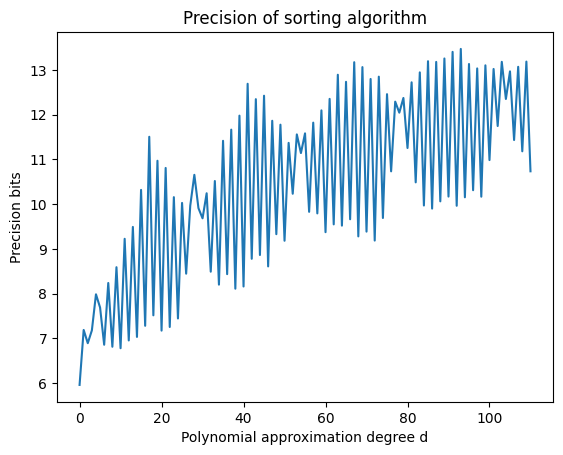

In [59]:
mean_precisions = []
for degree in times.keys():
    mean_precisions.append(df_precisions.loc[:, degree].mean())
plt.title("Precision of sorting algorithm")
plt.plot(mean_precisions)
plt.xlabel('Polynomial approximation degree d')
plt.ylabel('Precision bits') 

In [66]:
for i in range(len(mean_precisions)):
    print("{} {}".format(i+20, mean_precisions[i]))

20 5.96227
21 7.190569999999999
22 6.89449
23 7.180370000000001
24 7.9866399999999995
25 7.69204
26 6.859729999999999
27 8.239130000000001
28 6.814780000000001
29 8.591629999999999
30 6.781819999999999
31 9.22614
32 6.95579
33 9.491370000000002
34 7.034350000000001
35 10.31799
36 7.282939999999999
37 11.504900000000001
38 7.516740000000001
39 10.969249999999999
40 7.175300000000002
41 10.80849
42 7.256279999999999
43 10.156160000000002
44 7.446470000000001
45 10.02735
46 8.44715
47 9.966159999999999
48 10.654910000000001
49 9.9109
50 9.68367
51 10.243010000000002
52 8.491299999999999
53 10.516729999999999
54 8.202090000000002
55 11.414959999999999
56 8.43653
57 11.66422
58 8.11181
59 11.97687
60 8.160509999999999
61 12.68856
62 8.77945
63 12.34493
64 8.863769999999999
65 12.42203
66 8.6093
67 11.862280000000002
68 9.32919
69 11.775
70 9.182400000000001
71 11.368660000000002
72 10.232380000000001
73 11.557399999999998
74 11.14115
75 11.58096
76 9.82839
77 11.82058
78 9.79344
79 12.09457

Text(0, 0.5, 'Time (s)')

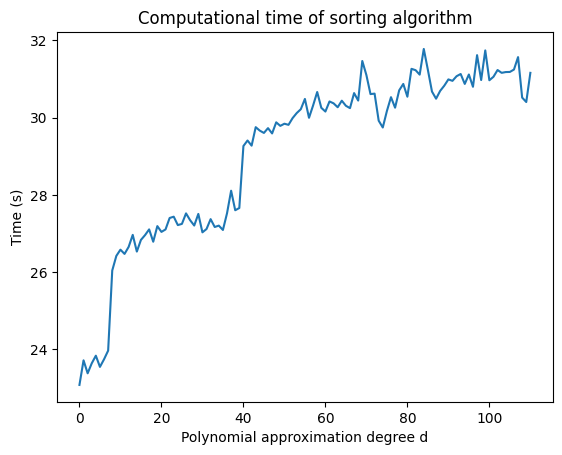

In [60]:
mean_times = []
for degree in times.keys():
    mean_times.append(df_times.loc[:, degree].mean())
plt.title("Computational time of sorting algorithm")
plt.plot(mean_times)
plt.xlabel('Polynomial approximation degree d')
plt.ylabel('Time (s)') 

In [61]:
for i in range(len(mean_times)):
    print("({}, {})".format(i + 20, mean_times[i]))

(20, 23.082666666666668)
(21, 23.719333333333335)
(22, 23.383444444444443)
(23, 23.641666666666666)
(24, 23.839444444444446)
(25, 23.549444444444447)
(26, 23.746555555555556)
(27, 23.970444444444446)
(28, 26.04477777777778)
(29, 26.422888888888888)
(30, 26.584222222222223)
(31, 26.47366666666667)
(32, 26.655444444444445)
(33, 26.96688888888889)
(34, 26.534666666666666)
(35, 26.83655555555556)
(36, 26.960444444444445)
(37, 27.10888888888889)
(38, 26.789444444444445)
(39, 27.193444444444445)
(40, 27.043777777777777)
(41, 27.107555555555553)
(42, 27.404)
(43, 27.437666666666665)
(44, 27.22011111111111)
(45, 27.25111111111111)
(46, 27.52333333333333)
(47, 27.346333333333334)
(48, 27.208444444444446)
(49, 27.50922222222222)
(50, 27.032666666666664)
(51, 27.118555555555556)
(52, 27.374222222222222)
(53, 27.171000000000003)
(54, 27.206444444444443)
(55, 27.093666666666664)
(56, 27.525777777777776)
(57, 28.110444444444443)
(58, 27.604)
(59, 27.662333333333336)
(60, 29.266666666666666)
(61, 29.

Degree with the best ratio: 109


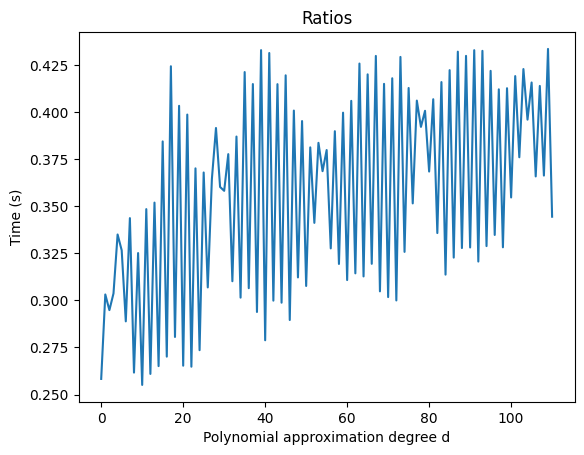

In [62]:
ratios = []
for i in range(len(mean_times)):
    ratios.append(mean_precisions[i] / mean_times[i])
plt.title("Ratios")
plt.plot(ratios)
plt.xlabel('Polynomial approximation degree d')
plt.ylabel('Time (s)') 

print("Degree with the best ratio: {}".format(ratios.index(max(ratios))))